# Evaluate models

BTVN:

Evaluate the training models on the *churn_modeling.csv* dataset to predict customer churn.

Split the train/test dataset with *test_size = 0.2* and *random_state = 42*

Use 3 models for training and prediction.
- Model 1: always predicts 0
- Model 2: Logistic regression
- Model 3: KNN.

Calculation parameters:
- Accuracy.
- Confusion matrix.
- Precision, recall, f1.
- AUC, ROC (if any).

In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
# Drop irrelevant columns
df = df.drop(['RowNumber', 'CustomerId','Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
# Check the summary statistics
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
# Check for missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Check for duplicates
df.duplicated().sum()

0

In [7]:
# Check the imbalance of the target variable
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
# Apply one-hot encoding for all categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

In [9]:
# Split the dataset into features and target
X = df_encoded.drop('Exited', axis=1).values
y = df_encoded['Exited'].values

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Models to evaluate
models = {
    'Always Predicts 0': DummyClassifier(strategy='constant', constant=0),
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier()
}

In [13]:
# Initialize lists to store fpr and tpr values for all models
all_fpr = []
all_tpr = []
all_auc_roc = []

Model: Always Predicts 0
Accuracy: 0.8035
Confusion Matrix:
[[1607    0]
 [ 393    0]]
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


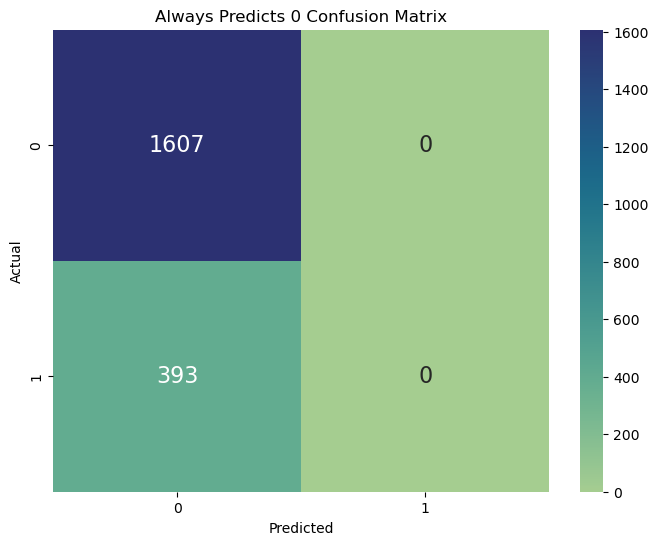

Model: Logistic Regression
Accuracy: 0.811
Confusion Matrix:
[[1543   64]
 [ 314   79]]
Precision: 0.5524475524475524
Recall: 0.2010178117048346
F1 Score: 0.2947761194029851


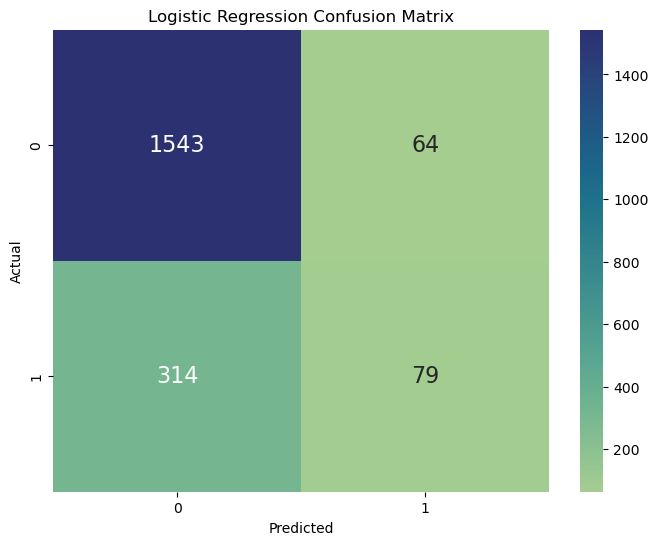

Model: KNN
Accuracy: 0.83
Confusion Matrix:
[[1514   93]
 [ 247  146]]
Precision: 0.6108786610878661
Recall: 0.37150127226463103
F1 Score: 0.46202531645569617


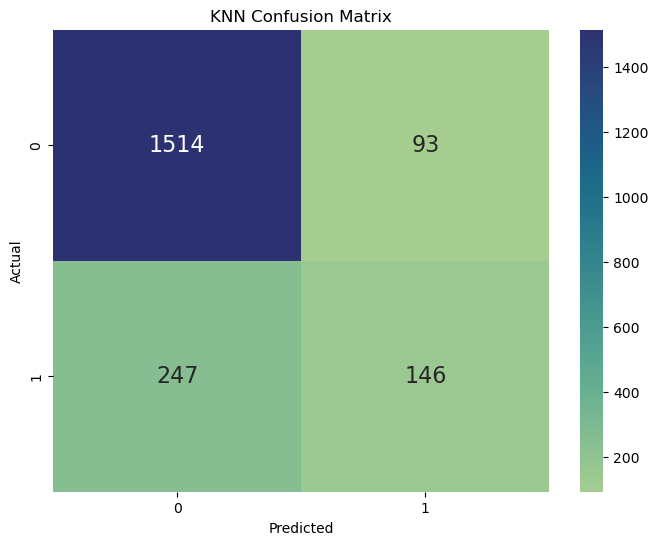

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
    
    # Print the results
    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Precision: {precision}\nRecall: {recall}\nF1 Score: {f1}')

    # Plot the confusion matrix as a heatmap with seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix,
                annot=True,
                cmap='crest',
                fmt='g',
                annot_kws={'fontsize': 16},
                )  
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Calculate and print AUC-ROC for models that can estimate probability
    if hasattr(model, 'predict_proba'):
        y_prob = model.predict_proba(X_test)[:, 1]
        auc_roc = roc_auc_score(y_test, y_prob)
        all_auc_roc.append(auc_roc)
        
        # Compute ROC curve and ROC area
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        all_fpr.append(fpr)
        all_tpr.append(tpr)
        # plt.plot(fpr, tpr, label=f'{name} (area = {auc_roc:.2f})')


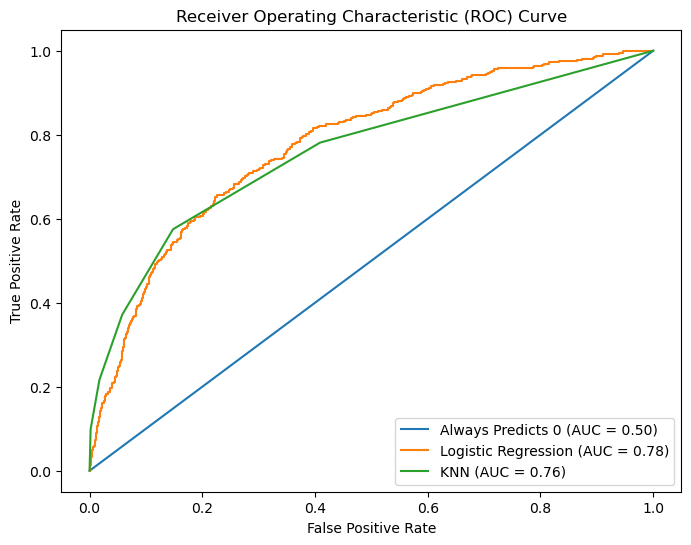

In [15]:
from sklearn.metrics import RocCurveDisplay

# Plot all AUC-ROC curves in one plot using RocCurveDisplay
plt.figure(figsize=(8, 6))
for i in range(len(models)):
    roc_display = RocCurveDisplay(fpr=all_fpr[i],
                                  tpr=all_tpr[i],
                                  roc_auc=all_auc_roc[i],
                                  estimator_name=list(models.keys())[i]).plot(ax=plt.gca())
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()